In [56]:
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# Dimentionality Reduction (Day2)
This mini note book is for reducing the involved parameters to the most important 2 parameters. The reduction is
statistic and experience-based.

### The method
comparing the performance and results of different machine learning algorithims.

### The result
The result of accuracy was LOW but matched or very close to accuracy results of the ML models

### Note
#### Accuracies of all ML models were inconsistence within each model (cross validation), but among the models.

### The conclusion
The presence of social factor has great impact on behavior (diversing the outcome), and hence it has big masking effect on other parameters.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dataset = pd.read_csv ('Analysis of Excretions.csv')
dataset.head()

,Label,Sex,Group,Housing,Day1,D1Category,Day2,D2Category,Day3,D3Category,Total,TotalCategory
0,10A1,Male,P,(+Male+Cover),10,med,6,med,2,low,18,high
1,10B1,Male,P,(+Male+Cover),11,high,0,low,8,med,19,high
2,6A1,Male,P,(+Male+Cover),0,low,0,low,0,low,0,low
3,6B1,Male,P,(+Male+Cover),5,med,0,low,5,med,10,med
4,49C1,Male,P,(+Male+Cover),0,low,0,low,0,low,0,low


In [59]:
dataset = dataset[['Sex', 'Group', 'Housing', 'Day1', 'Day2', 'Day3', 'Total']]
dataset.head()

,Sex,Group,Housing,Day1,Day2,Day3,Total
0,Male,P,(+Male+Cover),10,6,2,18
1,Male,P,(+Male+Cover),11,0,8,19
2,Male,P,(+Male+Cover),0,0,0,0
3,Male,P,(+Male+Cover),5,0,5,10
4,Male,P,(+Male+Cover),0,0,0,0


#### Creating a function for converting the numerical outcome of Excretion into binary (categorical) outcome "0" and "1".
Based on statistical analyses (especially Cummulative Density Function), zero outcome seems not coincidental. It represented
more than 50% of Ecxretion outcome and thoughout all days of the experiment.

In [60]:
def classify_excretion (number):
    if number == 0:
        return "0"
    else:
        return "1"

In [61]:
dataset ['Day1_binary'] = dataset['Day1'].apply(classify_excretion)
dataset ['Day2_binary'] = dataset['Day2'].apply(classify_excretion)
dataset ['Day3_binary'] = dataset['Day3'].apply(classify_excretion)
dataset ['Total_binary'] = dataset['Total'].apply(classify_excretion)

#### Encoding the categorical parameters ("Sex","Group","Housing) to make them available for machine learning calculation.

In [62]:
# Encoding the categorical variables
dataset = pd.get_dummies(dataset, columns= ["Sex","Group","Housing"], prefix= ["Sex","Group","Housing"])

In [63]:
dataset.head()

,Day1,Day2,Day3,Total,Day1_binary,Day2_binary,Day3_binary,Total_binary,Sex_Female,Sex_Male,Group_P,Group_S,Housing_(+Male+Cover),Housing_(+Male-Cover),Housing_(-Male+Cover),Housing_(-Male-Cover)
0,10,6,2,18,1,1,1,1,0,1,1,0,1,0,0,0
1,11,0,8,19,1,0,1,1,0,1,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,5,0,5,10,1,0,1,1,0,1,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0


### Machine Learning starts here.
#### The 1st model is Logistic Regression
#### The result consists of the following:
1. 2x2 table
2. Cross Validation for 10 subset (k-fold)
3. The accuracies of the mean and standard deviation
4. Visualising the Training set result
5. Visualising the Test set result

In [64]:
# creating matrix of features to identify the dependent factor vs independent factors (parameters)
# Avoid the dummy variable trap is done by dropping 1 dummy variable from each category. Some libraries do it for you 
X = dataset.iloc[:, [8,10]].values  
y = dataset.iloc[:, 5].values 

In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [66]:
# A) Fitting Logistic Regression to the Training set
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41, 15],
       [32,  9]])

In [68]:
# Applying k-Fold Cross Validation (evaluating the model performance)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.72727273  0.45454545  0.5         0.7         0.7         0.55555556
  0.55555556  0.77777778  0.22222222  0.66666667]
0.58595959596
0.157511933461


(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

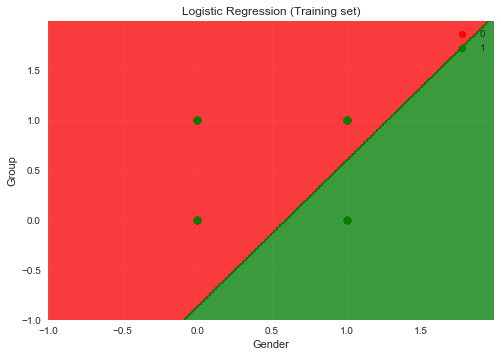

In [69]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

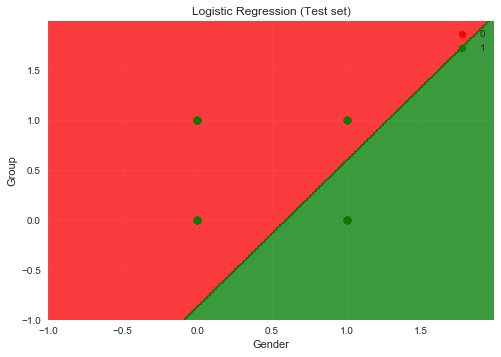

In [70]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

### Machine Learning starts here.
#### The 2nd model is KNN (K-nearest neighbor)
#### The result consists of the following:
1. 2x2 table
2. Cross Validation for 10 subset (k-fold)
3. The accuracies of the mean and standard deviation
4. Visualising the Training set result
5. Visualising the Test set result

In [71]:
# B) Fitting KNN to the Training set
# Creating KNN class (classifier)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 41],
       [11, 30]])

In [73]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.63636364  0.54545455  0.7         0.8         0.6         0.11111111
  0.33333333  0.55555556  0.33333333  0.66666667]
0.528181818182
0.19757867528


(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

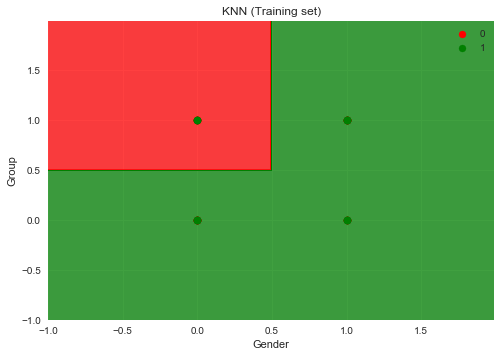

In [74]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

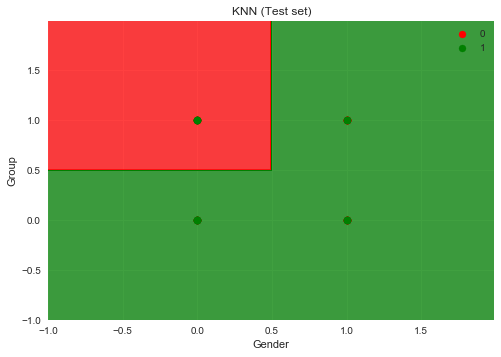

In [75]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

### Machine Learning starts here.
#### The 3rd model is SVC (Support Vector Classifier)
#### The result consists of the following:
1. 2x2 table
2. Cross Validation for 10 subset (k-fold)
3. The accuracies of the mean and standard deviation
4. Visualising the Training set result
5. Visualising the Test set result

In [76]:
# C) Fitting SVC to the Training set. The assumption is that the data is linearly separable.
# Creating SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 31],
       [26, 15]])

In [78]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.54545455  0.45454545  0.4         0.6         0.6         0.11111111
  0.55555556  0.55555556  0.33333333  0.55555556]
0.471111111111
0.146307264799


(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

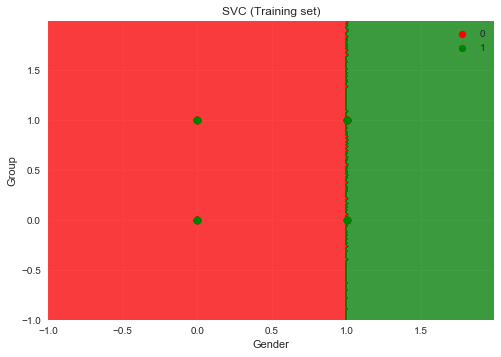

In [79]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

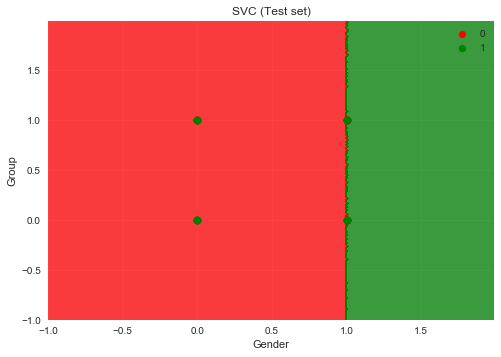

In [80]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

#### The 4th model is kernel SVC
#### The result consists of the following:
1. 2x2 table
2. Cross Validation for 10 subset (k-fold)
3. The accuracies of the mean and standard deviation
4. Visualising the Training set result
5. Visualising the Test set result

In [81]:
# D) Fitting kernel SVC to the Training set. The assumption is that the data is NOT-linearly separable.
# Creating kernel SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41, 15],
       [32,  9]])

In [83]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.54545455  0.45454545  0.4         0.6         0.6         0.11111111
  0.55555556  0.55555556  0.22222222  0.55555556]
0.46
0.159933283713


(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

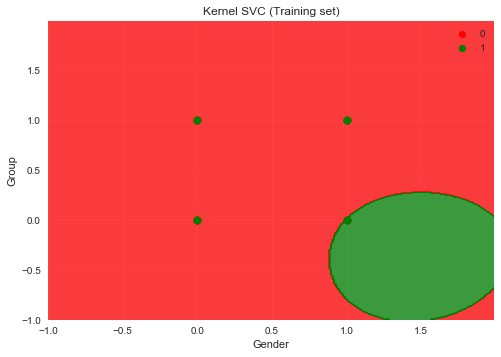

In [84]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVC (Training set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

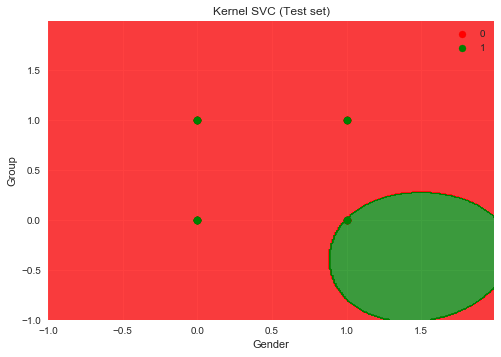

In [85]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVC (Test set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

In [51]:
# E) Fitting Naive Bayes to the Training set. The assumption is that the parameters are independant.
# Creating Naive Bayes class (classifier)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() # naive bayes has no arguements
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41, 15],
       [32,  9]])

In [53]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.72727273  0.45454545  0.4         0.6         0.7         0.55555556
  0.55555556  0.77777778  0.22222222  0.66666667]
0.56595959596
0.160774354364


(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

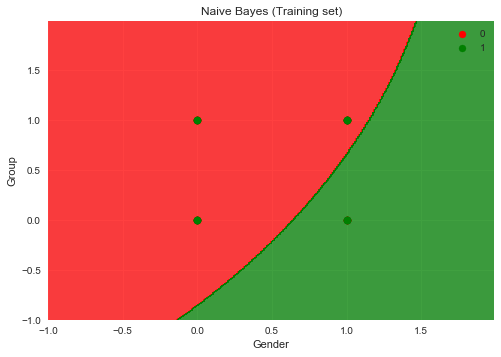

In [54]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

(-1.0, 1.9900000000000029)

(-1.0, 1.9900000000000029)

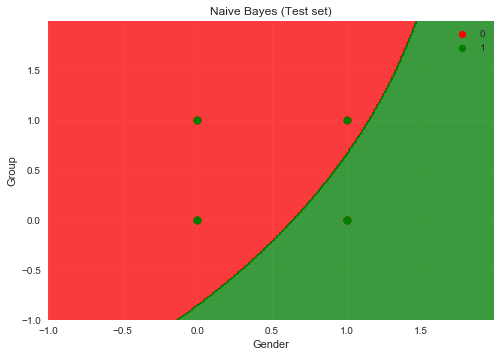

In [55]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Gender')
plt.ylabel('Group')
plt.legend()
plt.show()

# Applying Grid Search to find the best model and the best parameters
#### The result of accuracy was LOW but matched or very close to accuracy results of the above ML models
### Note
#### Accuracies of all ML models were inconsistence within each model (cross validation), but among the models.

In [49]:
# Applying Grid Search to find the best model and the best parameters. Here is just the code. Excuting the code on many
# independent variables is time and computation comsuming. We will do it after dimentionality reduction.
from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1000, 1500, 2000, 3000], 'kernel': ['linear']},
              {"C": [1000, 1500, 2000, 3000], 'kernel': ['rbf'], 'gamma': [0.05, 0.01, 0.02, 0.03, 0.04]}] #if you get 0.5 as the best
                                                    # then exchange 0.001 and 0.0001 by 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,and 0.9
grid_search = GridSearchCV (estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit (X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [50]:
print (best_accuracy)
print (best_parameters)

0.484536082474
{'C': 1000, 'gamma': 0.05, 'kernel': 'rbf'}


### End of the sub-project. Thank you